# Importation des librairies à utiliser

In [54]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Chargement des données

In [55]:
df= pd.read_csv('kc_house_data.csv')

# Exploration des données

#### Afficher le nombre de lignes et de colonnes.

In [56]:
df.shape

(21613, 21)

#### Afficher les noms des features

In [57]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Afficher les 5 premières lignes. 

In [58]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Afficher les 5 derniéres lignes. 

In [59]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


#### On remarque que les variables date et id sont inutiles

In [60]:
df=df.drop(['id','date'],axis=1)

In [61]:
df.shape

(21613, 19)

#### Afficher des informations sur le Dataframe

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

## interpretation de .info():
On remarque qu'il n'y a pas de valeurs nulles dans notre Dataframe car le nombre de valeurs non nulles de chaque feature est égale au nombre de lignes.

### On peut valider ça avec la methode .isnull().sum() qui somme le nombre de valeurs nulles:

In [63]:
df.isnull().sum().sum()

0

### Vérifier s'il y a une ligne redandante

In [64]:
df.duplicated().any()

True

#### Afficher un résumé des statistiques descriptives

In [65]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### La variable "Zipcode" représente les codes postaux qui sont numérotés avec le premier chiffre représentant un certain groupe d'États américains, les deuxième et troisième chiffres représentant une région de ce groupe (ou peut-être une grande ville) et les quatrième et cinquième chiffres représentant un groupe d'adresses de livraison dans cette région. 

#### Dans notre cas on a besoin seulement du 2éme et 3éme chiffres qui représentent les régions appartenant au groupe '9' .Donc, ci-dessous on a effectué l'extraction de ces 2 chiffres à partir de tous les codes postaux existant dans notre dataset.

In [66]:
AREA= [str(x)[1:3] for x in df.zipcode.tolist()]

In [67]:
l=[]
def unique(list1,l):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        l.append(x)

#### La fonction 'unique' sert à extraire les ensembles contenant les 2éme et 3éme chiffres d'une manière distincte dans le but d'obtenir une liste l contenant une seule occurence de chaque région.

In [68]:
unique(AREA,l)

In [69]:
len(l)

2

In [70]:
l

['81', '80']

#### On a pu conclure que tous les maisons qu'on est en train de traiter existent soit dans la région '81' ou la région '80'

### Matrice de corrélation
##### On peut afficher la matrice de corrélation pour determiner les variables corrélées dans le but de visualizer les relations entre elles.

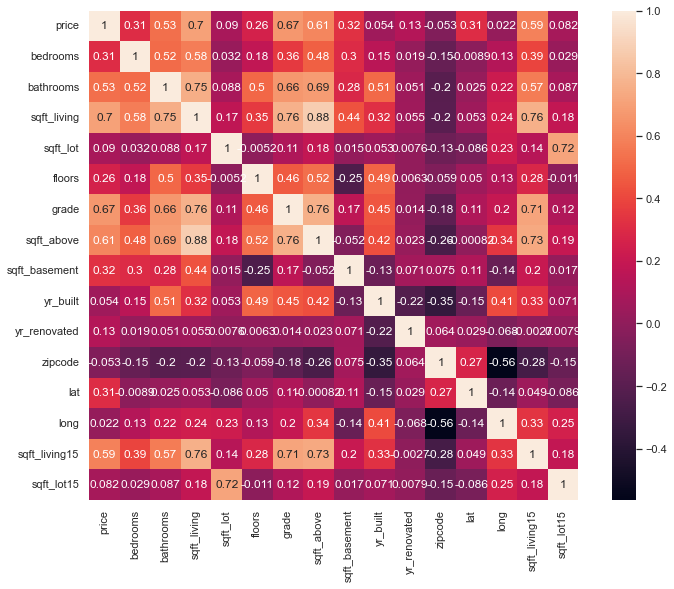

In [71]:
corrmat = (df.drop(["view","condition","waterfront"],axis=1)).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True,annot=True);

#### D'après la matrice de corrélation on peut conclure par exemple que (sqft_above,sqft_living),(grade,sqft_living),(sqft_living,bathrooms) sont fortement corréllés.
#### On peut visualizer les relations entre quelques features avec les courbes ci-dessous qui représentent la variation des variables les plus corrélées deux à deux

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


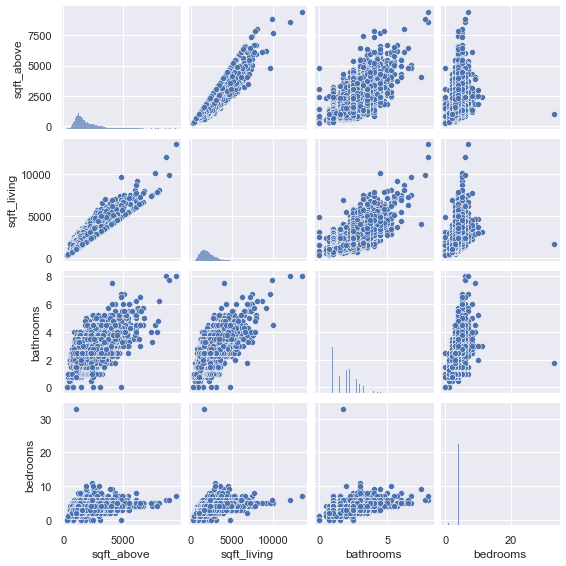

In [72]:
sns.set()
cols = ['sqft_above', 'sqft_living', 'bathrooms', 'bedrooms'] 
sns.pairplot(df[cols], size = 2)
plt.show();

#### On remarque qu'il ya une relation quasi-linéaire entre les 2 variables "sqft_living" et "sqft_above" ce qui justifie la valeur de corrélation trouvé dans la matrice de corrélation.

In [73]:
print(df.query("sqft_living - sqft_above == sqft_basement").shape)
print(df.query("sqft_living - sqft_above != sqft_basement").shape)

(21613, 19)
(0, 19)


#### Ce qui prouve que sqft_living = sqft_above + sqft_basement.
#### On a donc essayé d'éliminer cette variable mais on a remarqué qu'aprés l'élimintion la valeur du RMSE a augmenté et la valeur du R² ajusté a diminué. Donc on a décidé de garder cette variable dans notre dataset.

### Visualizons l'effet de quelques features sur le Churn (Variable cible).

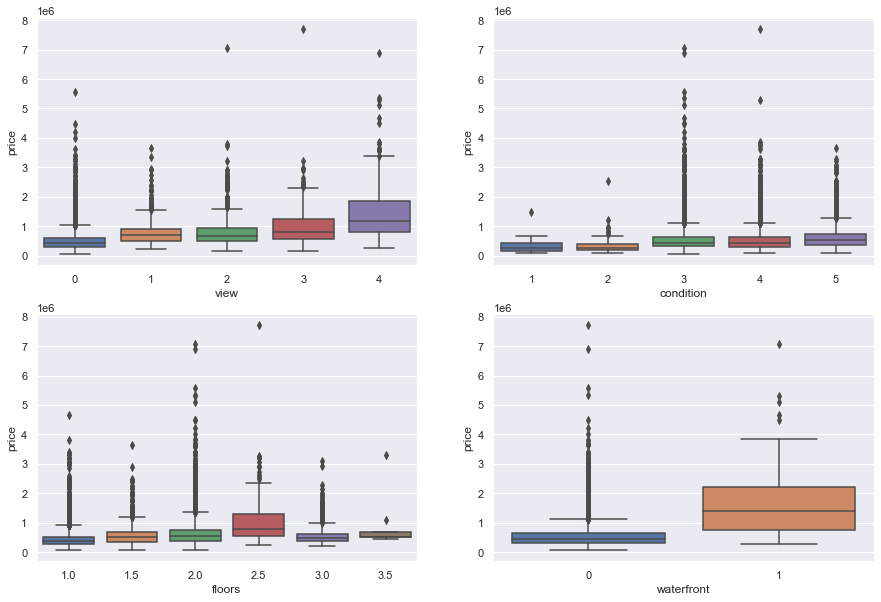

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(["view","condition","floors","waterfront"], ax.flatten()):
    sns.boxplot(x=var, y='price', data=df, ax=subplot)

#### On remarque qu'ils existent des maisons avec des prix très élevés malgrès les valeurs basses des variables 'condition' et 'view' donc il est possible qu'ils sont des valeurs abbérantes.

#### On a décidé alors de verifier s'il y a des observations irréelles parmis eux.

In [75]:
df.query("price>3000000")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
300,3075000.0,4,5.00,4550,18641,1.0,1,4,3,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
656,3070000.0,3,2.50,3930,55867,1.0,1,4,4,8,2330,1600,1957,0,98034,47.7022,-122.224,2730,26324
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2085,3850000.0,4,4.25,5770,21300,2.0,1,4,4,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748
2444,3278000.0,2,1.75,6840,10000,2.5,1,4,3,11,4350,2490,2001,0,98008,47.6042,-122.112,3120,12300
2626,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
2864,3600000.0,3,3.25,5020,12431,2.0,1,4,3,10,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


#### On a visualisé tous les données concerants toutes les maisons ayant un prix élevé supérieur à 3000000 et on a pu conclure que leurs valeurs sont logiques puisque la surface de ces maisons sont tous très grandes ainsi que leurs notes et d'autres caractéristiques ce qui justifie l'élévation du prix. 

<AxesSubplot:xlabel='grade', ylabel='price'>

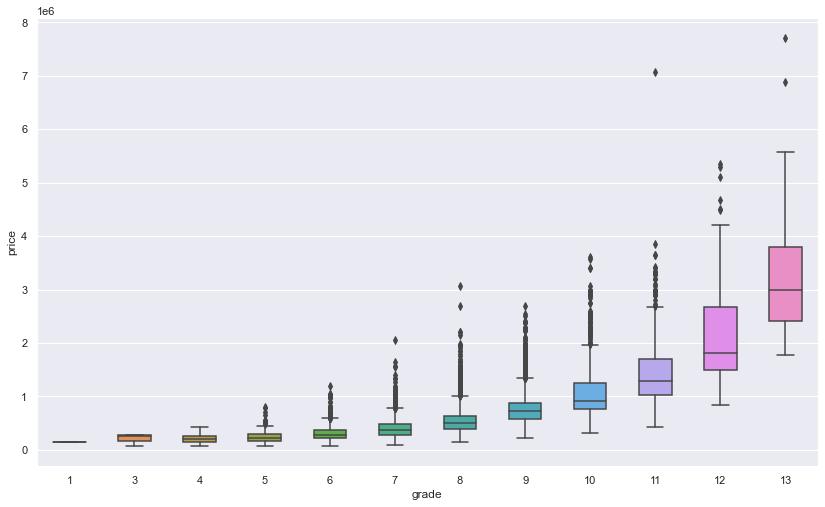

In [76]:
sns.boxplot(x='grade', y='price', data=df,width=0.5)

#### Les valeurs sont logiques, plus la variable 'grade' augmente plus le prix augmente.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

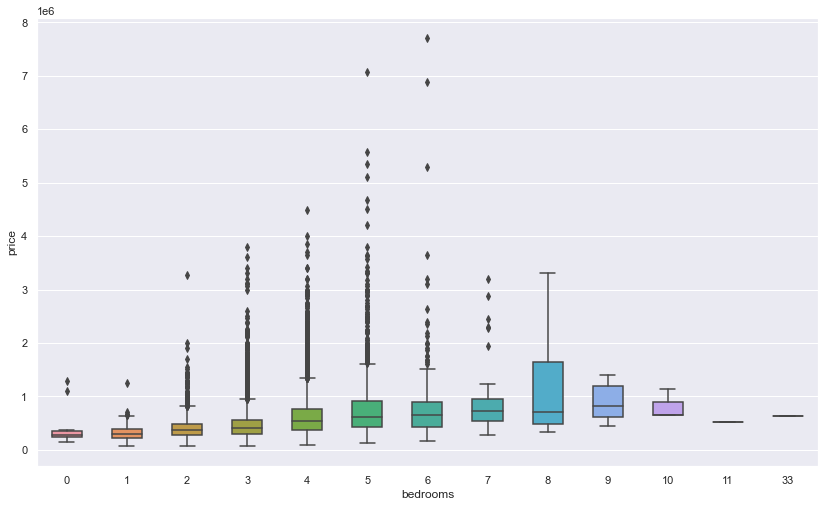

In [77]:
sns.boxplot(x='bedrooms', y='price', data=df,width=0.5)

#### La ayants 33 bedrooms possédent un prix très bas par rapport leur grand nombre de chambres, donc cette valeur peut être abbérante. 

In [78]:
df.query("bedrooms==33")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


#### Après la vérification des données de la maison possédant 33 chambres, on a constaté que c'est impossible qu'une surface de 1620 sqft = 150 m² peut contenir 33 chambres, ces données ne sont pas logique donc cette valeur doit être éliminée.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

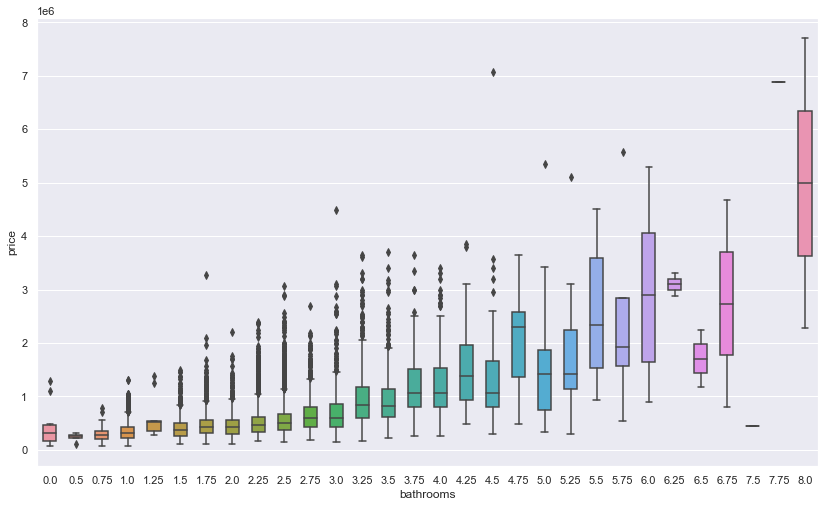

In [79]:
sns.boxplot(x='bathrooms', y='price', data=df,width=0.5)

## Power BI

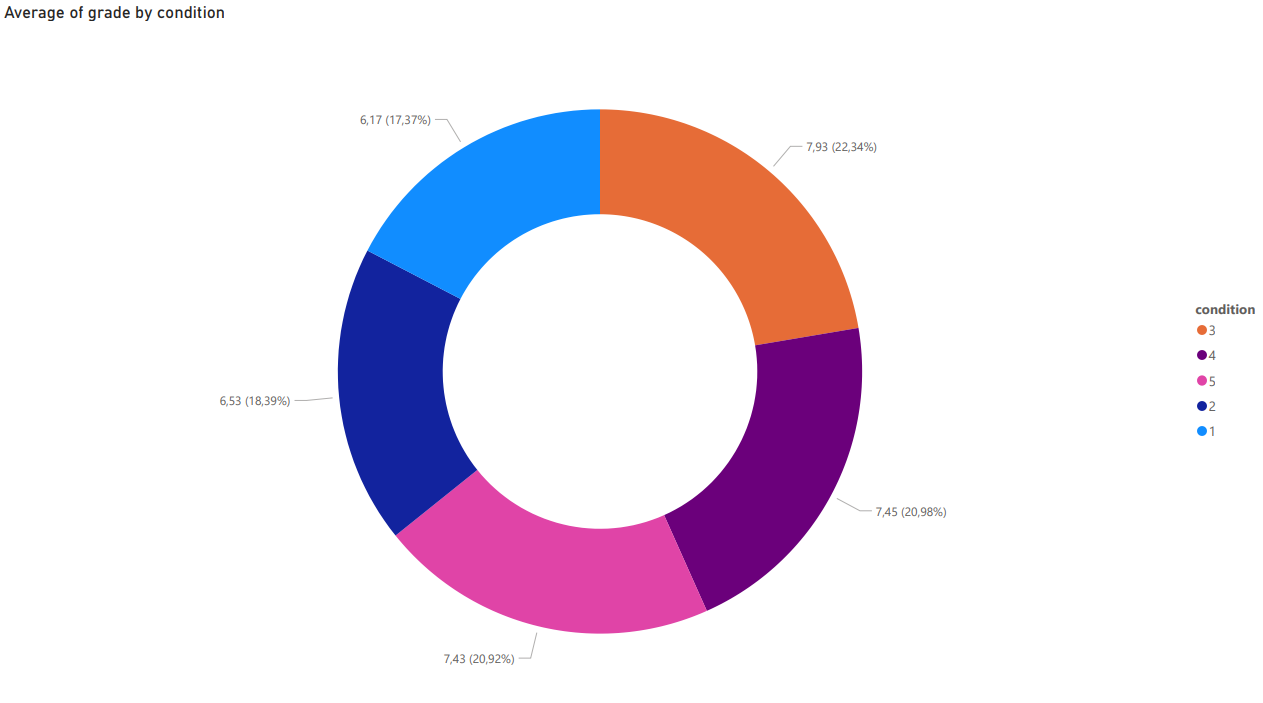

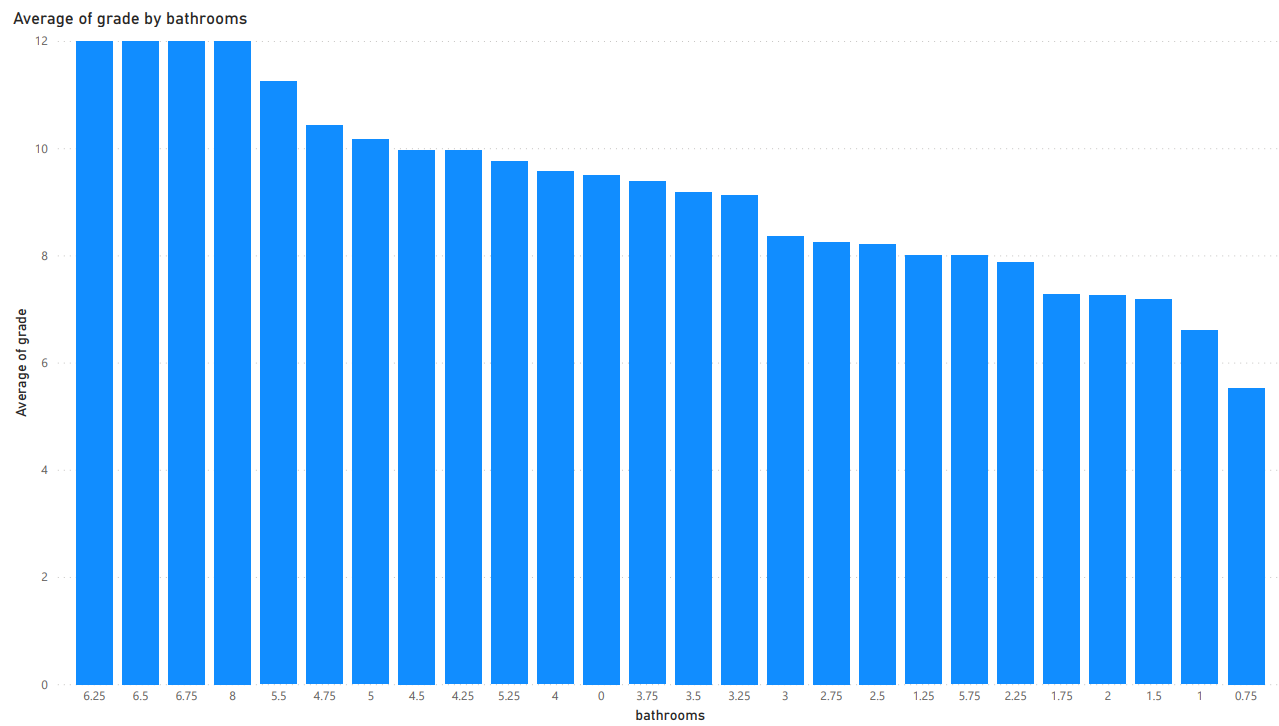

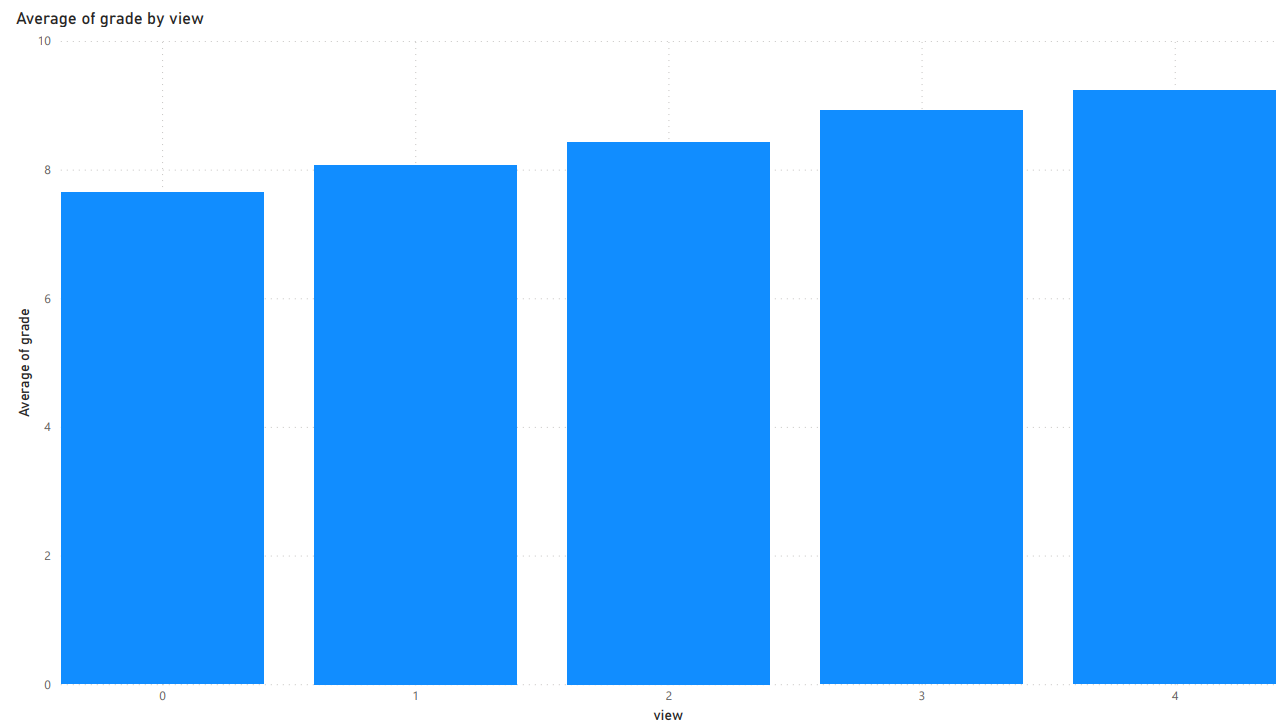

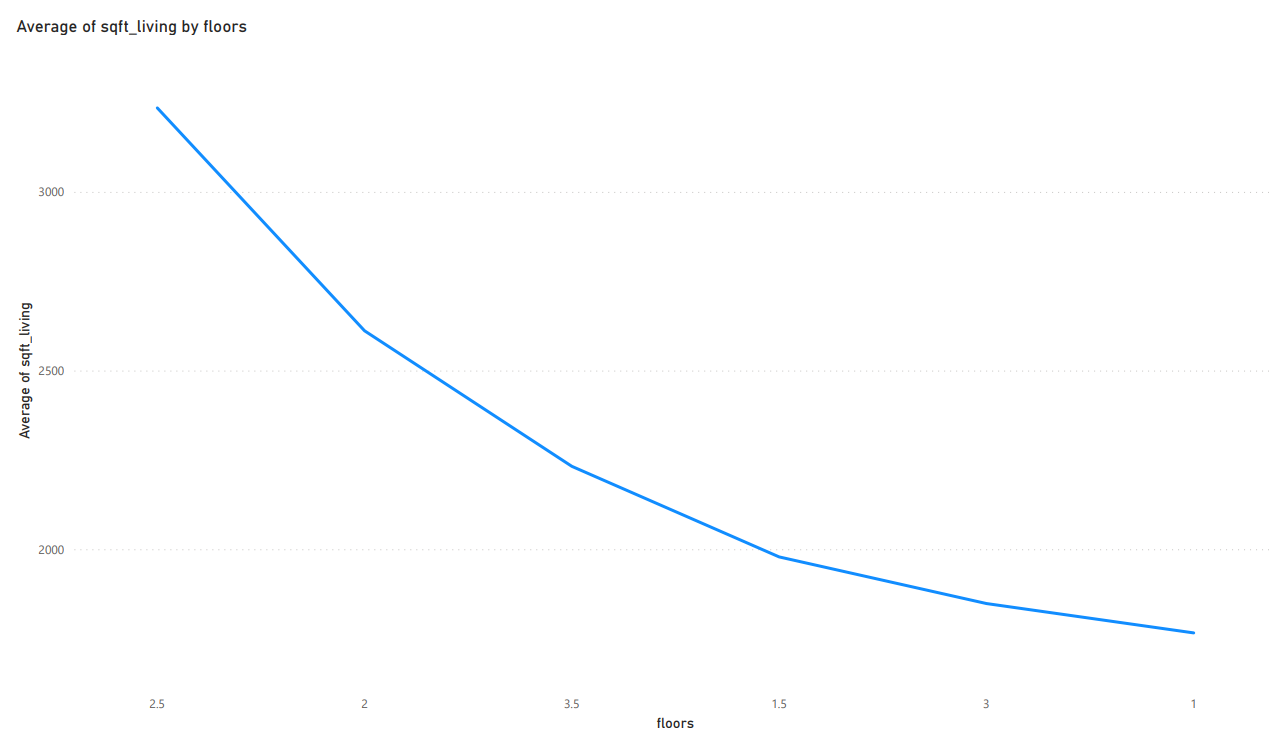

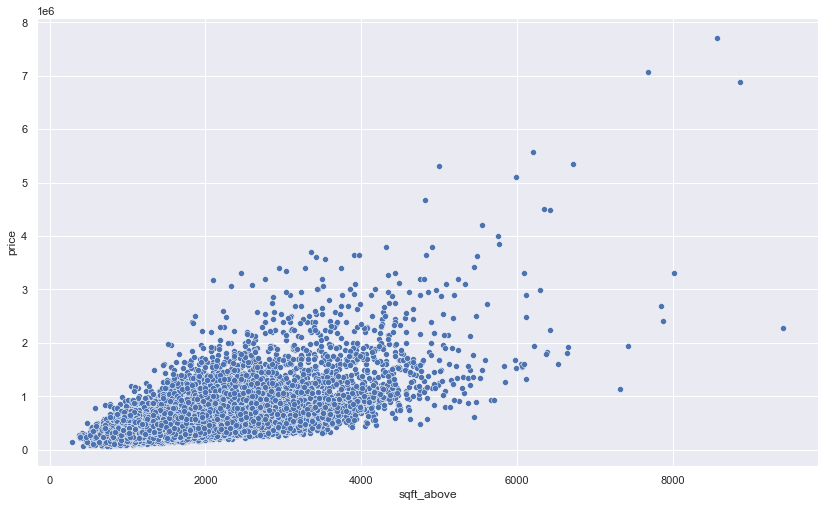

In [80]:
sns.scatterplot(x=df['sqft_above'], y=df['price'])
sns.set(rc={'figure.figsize':(14,8.25)})

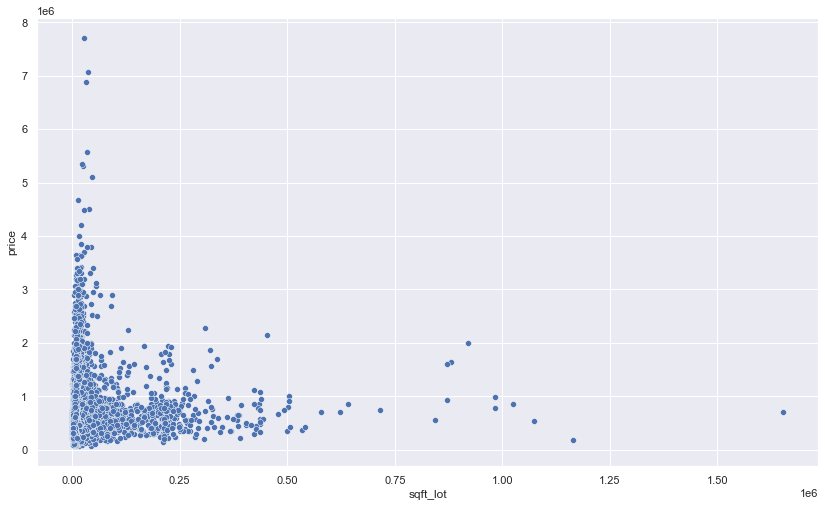

In [81]:
sns.scatterplot(x=df['sqft_lot'], y=df['price']);

#### On remarque l'existence d'une seule valeur de sqft_lot>1000000 qui semble très grande par rapport les autres valeurs avec un prix trés basse.

In [82]:
df.query("sqft_lot>1000000 and price<200000")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17319,190000.0,2,1.0,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730


#### Après la vérification, il semble que les valeurs sont illogiques puisque la variable sqft_lot = 1164794 sqft qui est égale à 108212 m² alors que le prix de cette maison n'est que 190000 Euro. (à peu pret 2 euro pour chaque m²). Donc on va supprimer cette ligne dans la partie de nettoyage de données.

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

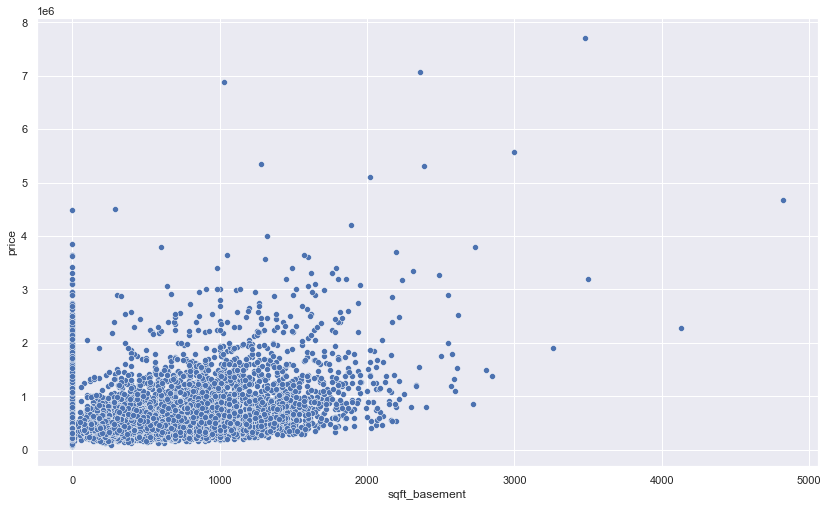

In [83]:
sns.scatterplot(x=df['sqft_basement'], y=df['price'])

<AxesSubplot:xlabel='yr_built', ylabel='price'>

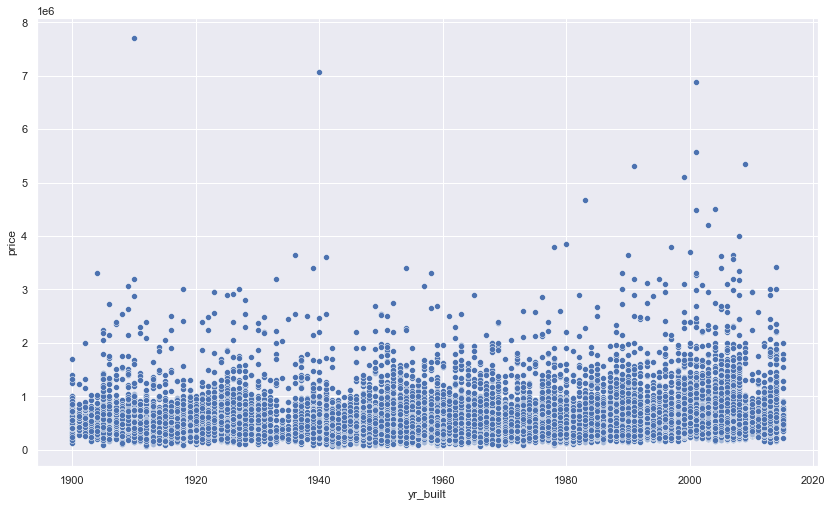

In [84]:
sns.scatterplot(x=df['yr_built'], y=df['price'])

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

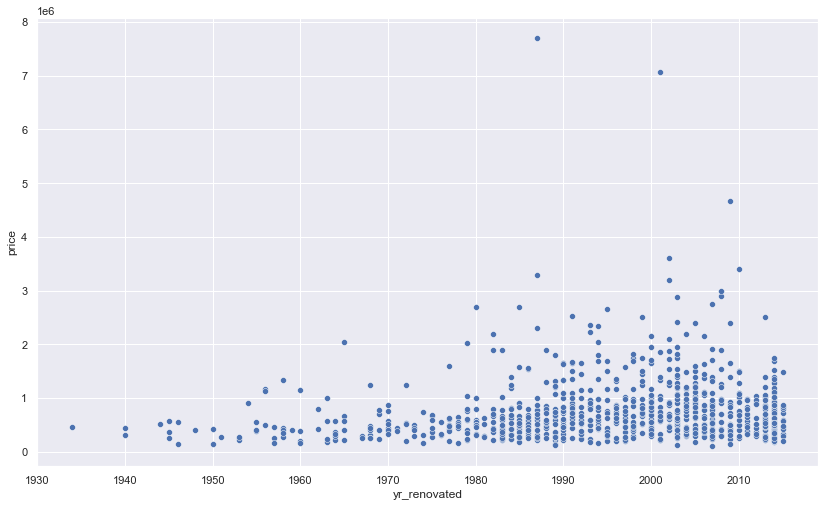

In [85]:
sns.scatterplot(x=df.query("yr_renovated!=0")['yr_renovated'], y=df['price'])

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

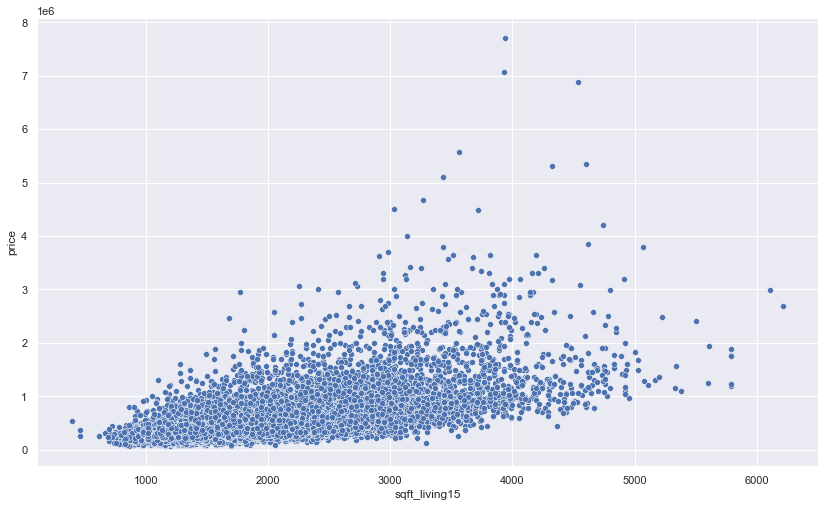

In [86]:
sns.scatterplot(x=df['sqft_living15'], y=df['price'])

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

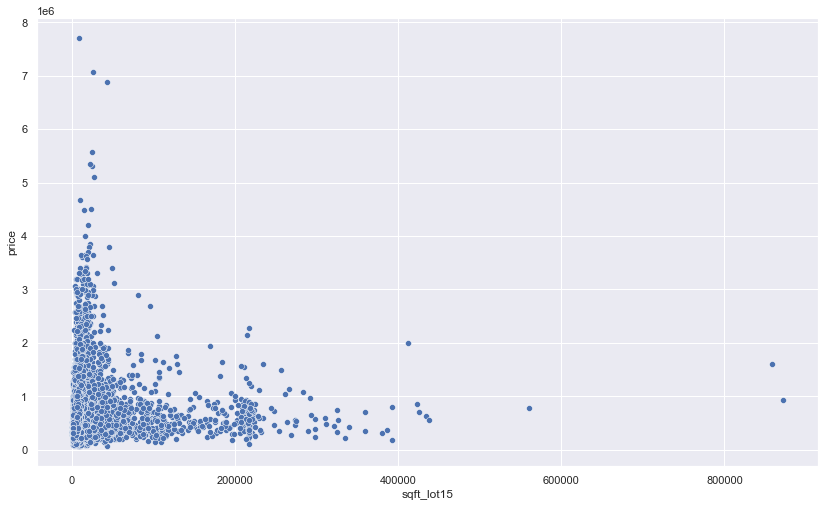

In [87]:
sns.scatterplot(x=df['sqft_lot15'], y=df['price'])

In [88]:
df.query("sqft_lot15>600000")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,937500.0,4,4.0,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.676,-121.882,3420,871200
20452,1600000.0,4,5.5,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.664,-121.878,1280,858132


## PARTIE PREPARATION

## Nettoyage des données

### On n'a ni de valeurs nulles ni de valeurs manquantes, par contre on a détecté quelques valeurs qui sont irréelles.

##### suppression des valeurs abérantes déja detecté graphiquement

### On va seulement supprimer la valeur ayant 33 bedrooms car ce cas est irréel puisque la surface de ce maison ne peut pas contenir ce grand nombre de chambres.

In [89]:
df.drop([15870], axis=0, inplace=True)

In [90]:
### sqft > 100000

In [91]:
df.drop([17319], axis=0, inplace=True)

## Transformation des données

In [92]:
AREA= [str(x)[1:3] for x in df.zipcode.tolist()]

In [93]:
AREA

['81',
 '81',
 '80',
 '81',
 '80',
 '80',
 '80',
 '81',
 '81',
 '80',
 '80',
 '81',
 '80',
 '80',
 '81',
 '81',
 '80',
 '81',
 '80',
 '80',
 '81',
 '80',
 '80',
 '80',
 '80',
 '80',
 '81',
 '81',
 '81',
 '80',
 '80',
 '81',
 '81',
 '81',
 '80',
 '81',
 '80',
 '81',
 '80',
 '80',
 '80',
 '81',
 '80',
 '81',
 '80',
 '80',
 '80',
 '80',
 '81',
 '80',
 '81',
 '80',
 '81',
 '81',
 '81',
 '81',
 '80',
 '80',
 '80',
 '80',
 '81',
 '81',
 '81',
 '81',
 '81',
 '81',
 '80',
 '80',
 '80',
 '80',
 '80',
 '80',
 '81',
 '80',
 '80',
 '80',
 '80',
 '81',
 '81',
 '80',
 '80',
 '80',
 '81',
 '80',
 '81',
 '81',
 '80',
 '80',
 '80',
 '81',
 '80',
 '81',
 '80',
 '81',
 '81',
 '80',
 '80',
 '80',
 '80',
 '80',
 '81',
 '81',
 '80',
 '80',
 '80',
 '80',
 '81',
 '81',
 '80',
 '80',
 '80',
 '81',
 '80',
 '81',
 '80',
 '81',
 '81',
 '81',
 '81',
 '81',
 '81',
 '80',
 '81',
 '81',
 '80',
 '80',
 '81',
 '80',
 '81',
 '80',
 '80',
 '80',
 '80',
 '80',
 '81',
 '80',
 '80',
 '80',
 '81',
 '81',
 '81',
 '80',
 '80',

### La variable AREA est une liste des chaines de caractéres constituée des 2éme et 3éme chiffres de chaque zipcode existant dans notre dataset.

In [94]:
AREA = [1 if i=='81' else 0 for i in AREA]

In [95]:
df['zipcode']=AREA

### Les maisons qui appartiennent à la région "81" vont avoir 1 comme valeur de 'zipcode' et les maisons qui appartiennent à la région "80"  vont avoir 0 comme valeur de 'zipcode'.

In [96]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,0,47.5345,-122.069,1410,1287


### Encodage avec Dummies

In [97]:
df["view"]=df["view"].replace(0,"nulle")
df["view"]=df["view"].replace(1,"médiocre")
df["view"]=df["view"].replace(2,"passable")
df["view"]=df["view"].replace(3,"bonne")
df["view"]=df["view"].replace(4,"trés_bonne")
df["condition"]=df["condition"].replace(1,"mauvaise")
df["condition"]=df["condition"].replace(2,"assez mauvaise")
df["condition"]=df["condition"].replace(3,"passable")
df["condition"]=df["condition"].replace(4,"bonne")
df["condition"]=df["condition"].replace(5,"trés_bonne")

In [98]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [99]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'view_médiocre', 'view_nulle', 'view_passable', 'view_trés_bonne',
       'condition_bonne', 'condition_mauvaise', 'condition_passable',
       'condition_trés_bonne'],
      dtype='object')

### Mise en échelle

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols=['yr_renovated','yr_built','sqft_lot','sqft_living','floors','bedrooms','sqft_basement','bathrooms','sqft_above','sqft_living15','sqft_lot15','grade','lat','long']
df[cols] = sc.fit_transform(df[cols])

In [101]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,sqft_living15,sqft_lot15,view_médiocre,view_nulle,view_passable,view_trés_bonne,condition_bonne,condition_mauvaise,condition_passable,condition_trés_bonne
0,221900.0,-0.407005,-1.447563,-0.979938,-0.231195,-0.915505,0,-0.559010,-0.734818,-0.658664,...,-0.943401,-0.260711,0,1,0,0,0,0,1,0
1,538000.0,-0.407005,0.175519,0.533548,-0.192057,0.936414,0,-0.559010,0.460744,0.245135,...,-0.432742,-0.187866,0,1,0,0,0,0,1,0
2,180000.0,-1.508407,-1.447563,-1.426362,-0.124254,-0.915505,0,-1.409829,-1.229950,-0.658664,...,1.070053,-0.172375,0,1,0,0,0,0,1,0
3,604000.0,0.694396,1.149368,-0.130644,-0.247175,-0.915505,0,-0.559010,-0.891812,1.397478,...,-0.914220,-0.284516,0,1,0,0,0,0,0,1
4,510000.0,-0.407005,-0.149097,-0.435519,-0.171455,-0.915505,0,0.291808,-0.130999,-0.658664,...,-0.272250,-0.192847,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,-0.407005,0.500136,-0.598844,-0.342292,2.788333,0,0.291808,-0.312145,-0.658664,...,-0.666186,-0.412370,0,1,0,0,0,0,1,0
21609,400000.0,0.694396,0.500136,0.250450,-0.227188,0.936414,0,0.291808,0.629814,-0.658664,...,-0.228479,-0.203944,0,1,0,0,0,0,1,0
21610,402101.0,-1.508407,-1.772180,-1.154152,-0.336908,0.936414,0,-0.559010,-0.928041,-0.658664,...,-1.410289,-0.394131,0,1,0,0,0,0,1,0
21611,400000.0,-0.407005,0.500136,-0.522626,-0.311389,0.936414,0,0.291808,-0.227610,-0.658664,...,-0.841269,-0.420500,0,1,0,0,0,0,1,0


In [102]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'view_médiocre', 'view_nulle', 'view_passable', 'view_trés_bonne',
       'condition_bonne', 'condition_mauvaise', 'condition_passable',
       'condition_trés_bonne'],
      dtype='object')

## Feature Selection

### Sequential Feature Selection (SFS), dans laquelle les features sont ajoutées séquentiellement à un ensemble candidat vide jusqu'à ce que l'ajout d'autres features ne diminue pas le critère.

### Le critére est une fonction que la méthode cherche à minimiser sur tous les sous-ensembles de variables réalisables. Les critères courants sont l'erreur quadratique moyenne (pour les modèles de régression)

In [103]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [104]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
         k_features=(2,14),
         forward=True,
         floating=True,
         cv=20)
sfs.fit(df.drop(['price'],axis=1),df['price'])

SequentialFeatureSelector(cv=20, estimator=LinearRegression(), floating=True,
                          k_features=(2, 14), scoring='r2')

In [105]:
sfs.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'grade',
 'sqft_above',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'view_nulle',
 'view_trés_bonne',
 'condition_passable',
 'condition_trés_bonne')

In [106]:
n=len(sfs.k_feature_names_)

In [107]:
df=df[list(sfs.k_feature_names_)+['price']]

In [108]:
df

,bedrooms,bathrooms,sqft_living,waterfront,grade,sqft_above,yr_built,lat,long,sqft_living15,view_nulle,view_trés_bonne,condition_passable,condition_trés_bonne,price
0,-0.407005,-1.447563,-0.979938,0,-0.559010,-0.734818,-0.545053,-0.352484,-0.306041,-0.943401,1,0,1,0,221900.0
1,-0.407005,0.175519,0.533548,0,-0.559010,0.460744,-0.681241,1.161646,-0.746338,-0.432742,1,0,1,0,538000.0
2,-1.508407,-1.447563,-1.426362,0,-1.409829,-1.229950,-1.294087,1.283614,-0.135604,1.070053,1,0,1,0,180000.0
3,0.694396,1.149368,-0.130644,0,-0.559010,-0.891812,-0.204583,-0.283200,-1.271854,-0.914220,1,0,0,1,604000.0
4,-0.407005,-0.149097,-0.435519,0,0.291808,-0.130999,0.544451,0.409633,1.199490,-0.272250,1,0,1,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.407005,0.500136,-0.598844,0,0.291808,-0.312145,1.293485,1.005037,-0.938080,-0.666186,1,0,1,0,360000.0
21609,0.694396,0.500136,0.250450,0,0.291808,0.629814,1.463720,-0.356092,-1.051705,-0.228479,1,0,1,0,400000.0
21610,-1.508407,-1.772180,-1.154152,0,-0.559010,-0.928041,1.293485,0.247972,-0.604307,-1.410289,1,0,1,0,402101.0
21611,-0.407005,0.500136,-0.522626,0,0.291808,-0.227610,1.123250,-0.184327,1.029053,-0.841269,1,0,1,0,400000.0


# Utilisation de trois modéles de regression

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:n].values, df.iloc[:,n].values, test_size=0.3,random_state=1)

In [110]:
y_test

array([259000., 465000., 462550., ..., 260000., 317500., 293000.])

## Regression Linéaire

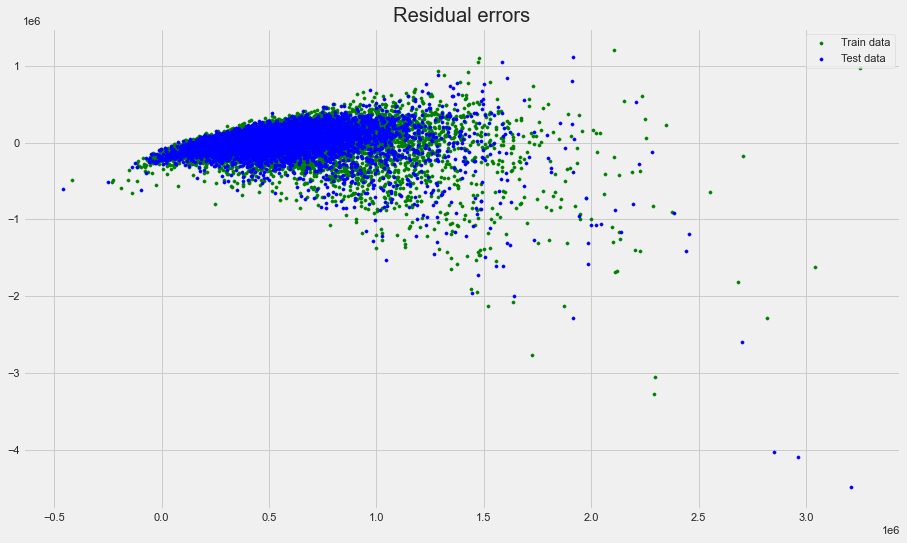

In [111]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
 
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [112]:
y_pred=reg.predict(X_test)

In [113]:
from sklearn import metrics

In [114]:
RSME = []
R_squared=[]
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score (R²):",reg.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R_squared.append(reg.score(X_test,y_test))

MAE: 128472.43736088955
MSE: 48311670501.65385
RMSE: 219799.15946530335
Score (R²): 0.6832405693039489


## Random forest

In [115]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [116]:
y_pred=regressor.predict(X_test)

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score (R^2):",regressor.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R_squared.append(regressor.score(X_test,y_test))

MAE: 74528.91223178667
MSE: 21855038619.853985
RMSE: 147834.49739439704
Score (R^2): 0.8567056464994691


## XGBOOST

In [118]:
pip install xgboost

In [119]:
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score (R^2):",xgb.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R_squared.append(xgb.score(X_test,y_test))

MAE: 74528.91223178667
MSE: 21855038619.853985
RMSE: 147834.49739439704
Score (R^2): 0.8700941330718988


## Comparaison des modéles

In [121]:
models=['LINEAR REGRESSION','XGBOOST','RANDOM FOREST']
plot = pd.DataFrame({'Models':models,"RSME":RSME,"R_squared":R_squared})
plot

,Models,RSME,R_squared
0,LINEAR REGRESSION,219799.159465,0.683241
1,XGBOOST,147834.497394,0.856706
2,RANDOM FOREST,147834.497394,0.870094


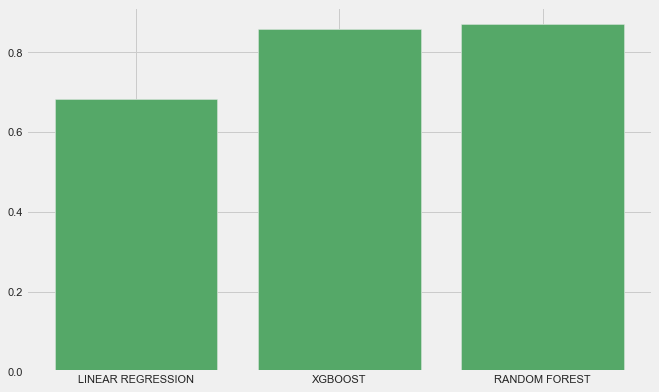

In [122]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6.25))
for row in range(2):
    plt.bar(models,R_squared,color='g')